### Introduction
For our group project we will be predicting the quality of different wine samples given different character traits of the wine. When wine is being processed for production and storage, it undergoes an oxidation reaction and loses some of its fruit aromas. However, this can be prevented buy adding preservatives such as sulpher dioxide. This acts as an antiseptic which prevents the prominent flavours from being lost over time and helps preserve the quality of the drink. In our study we will be asking if the quality of different wines, such as red vs white, can be predicted based on factors such as pH level, sulpher dioxide content, the amount of alcohol, and more in the drink. The quality will be determined using a 10 point scale. Current research on this topic that insipred this study comes from the article "Modeling wine preferences by data mining from physicochemical properties". The following study can be found here: https://www.sciencedirect.com/science/article/pii/S0167923609001377?via=ihub The dataset we will be using is https://www.kaggle.com/yasserh/wine-quality-dataset. The dataset has been made tidy for better comprehension and is included below.

### Method

We will be conducting our data analysis by tidying a dataset, and creating visualizations to predict the quality of wine using factors such as the total.sulfur.dioxide, pH, alcohol, residual.sugar, chlorides, density, and citric.acid. The seven variables above all have linear relationship with quality, and as a result they can be used to predict the quality. Some future questions this could lead to include the questioning which features that together create a prefered taste and how preservatives influcence the quality of of wine with time.


more info here

### Expected Outcome
The expected outcome of our study is that we will be able to predict the quality of wine based on the given pH, the amount of slupher dioxide, and the amount of alcohol in the wine. The impact of the findings in a real world context would include improving wine production and the ability to target techniques that produce a more favourable taste of wine. The impact of our direct project findings is to create a fast and accessible way to undertsand the quality of a certain wine in comparison to others by viewing it on a given plot.

In [56]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

In [57]:
wine_data <- read_csv('data/WineQT.csv')
colnames(wine_data) <- make.names(colnames(wine_data))

wine_data_clean <- wine_data %>%
select(total.sulfur.dioxide, pH, alcohol, quality, residual.sugar, chlorides, density, citric.acid)

head(wine_data_clean)


Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double(),
  Id = col_double()
)



total.sulfur.dioxide,pH,alcohol,quality,residual.sugar,chlorides,density,citric.acid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
34,3.51,9.4,5,1.9,0.076,0.9978,0.00
67,3.20,9.8,5,2.6,0.098,0.9968,0.00
54,3.26,9.8,5,2.3,0.092,0.9970,0.04
60,3.16,9.8,6,1.9,0.075,0.9980,0.56
34,3.51,9.4,5,1.9,0.076,0.9978,0.00
40,3.51,9.4,5,1.8,0.075,0.9978,0.00


In [58]:
# train the data

wine_split <- initial_split(wine_data_clean, prop = 0.75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)

#find mean of each predictors

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”
Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”


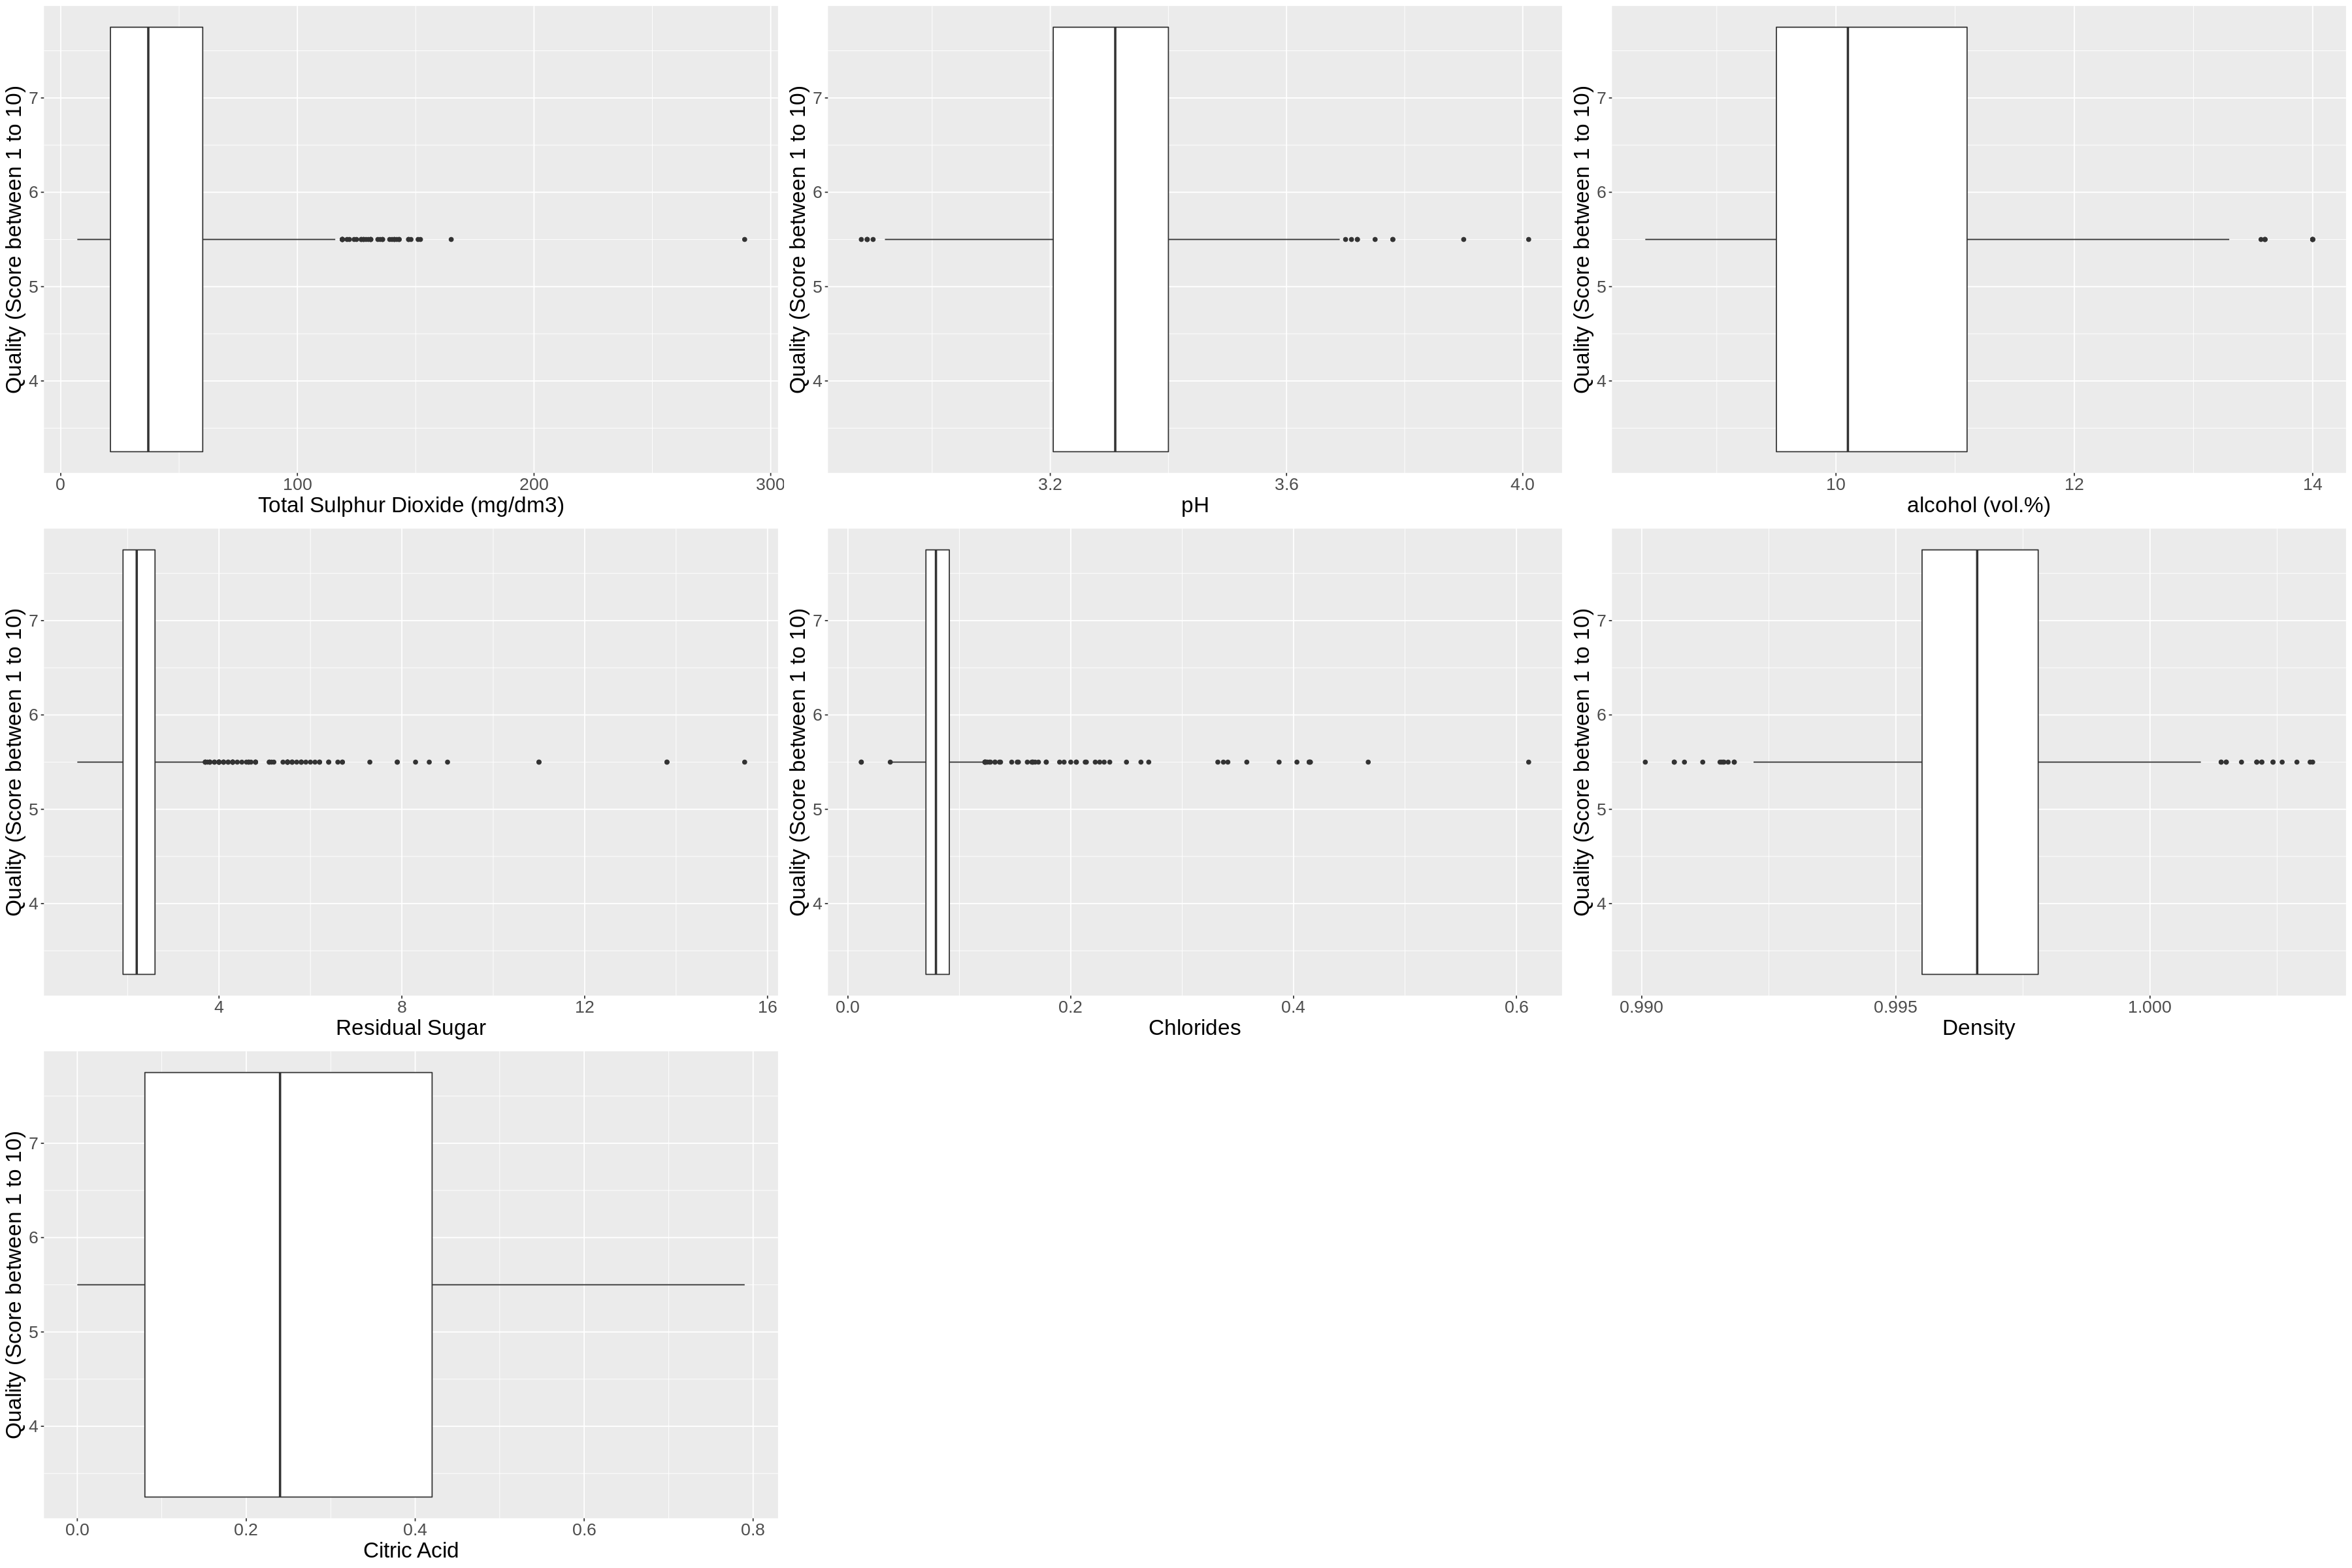

In [59]:
# Generate plots

options(repr.plot.width = 30, repr.plot.height = 20)

wine_boxplot_so2 <- wine_train %>%
    ggplot(aes(x = quality,
               y = total.sulfur.dioxide)) +
    geom_boxplot()+
    coord_flip()+
    xlab('Quality (Score between 1 to 10)') +
    ylab ('Total Sulphur Dioxide (mg/dm3)') +
    theme(text = element_text(size = 20))


wine_boxplot_pH <- wine_train %>%
    ggplot(aes(x = quality,
               y = pH)) +
    geom_boxplot() +
    coord_flip()+
    xlab('Quality (Score between 1 to 10)') + 
    ylab ('pH') +
    theme(text = element_text(size = 20))


wine_boxplot_alcohol <- wine_train %>%
    ggplot(aes(x = quality,
               y = alcohol)) +
    geom_boxplot()+
coord_flip()+
    xlab('Quality (Score between 1 to 10)') +
    ylab ('alcohol (vol.%)') +
    theme(text = element_text(size = 20))


wine_boxplot_residual.sugar <- wine_train %>%
    ggplot(aes(x = quality,
               y = residual.sugar)) +
    geom_boxplot()+
    coord_flip()+
    xlab('Quality (Score between 1 to 10)') +
    ylab ('Residual Sugar') +
    theme(text = element_text(size = 20))


wine_boxplot_chlorides <- wine_train %>%
    ggplot(aes(x = quality,
               y = chlorides)) +
    geom_boxplot()+
    coord_flip()+
    xlab('Quality (Score between 1 to 10)') +
    ylab ('Chlorides') +
    theme(text = element_text(size = 20))


wine_boxplot_density <- wine_train %>%
    ggplot(aes(x = quality,
               y = density)) +
    geom_boxplot()+
    coord_flip()+
    xlab('Quality (Score between 1 to 10)') +
    ylab ('Density') +
    theme(text = element_text(size = 20))

wine_boxplot_citric.acid <- wine_train %>%
    ggplot(aes(x = quality,
               y = citric.acid)) +
    geom_boxplot()+
    coord_flip()+
    xlab('Quality (Score between 1 to 10)') +
    ylab ('Citric Acid') +
    theme(text = element_text(size = 20))

plot_grid(wine_boxplot_so2, wine_boxplot_pH, wine_boxplot_alcohol, wine_boxplot_residual.sugar, wine_boxplot_chlorides, wine_boxplot_density, wine_boxplot_citric.acid)

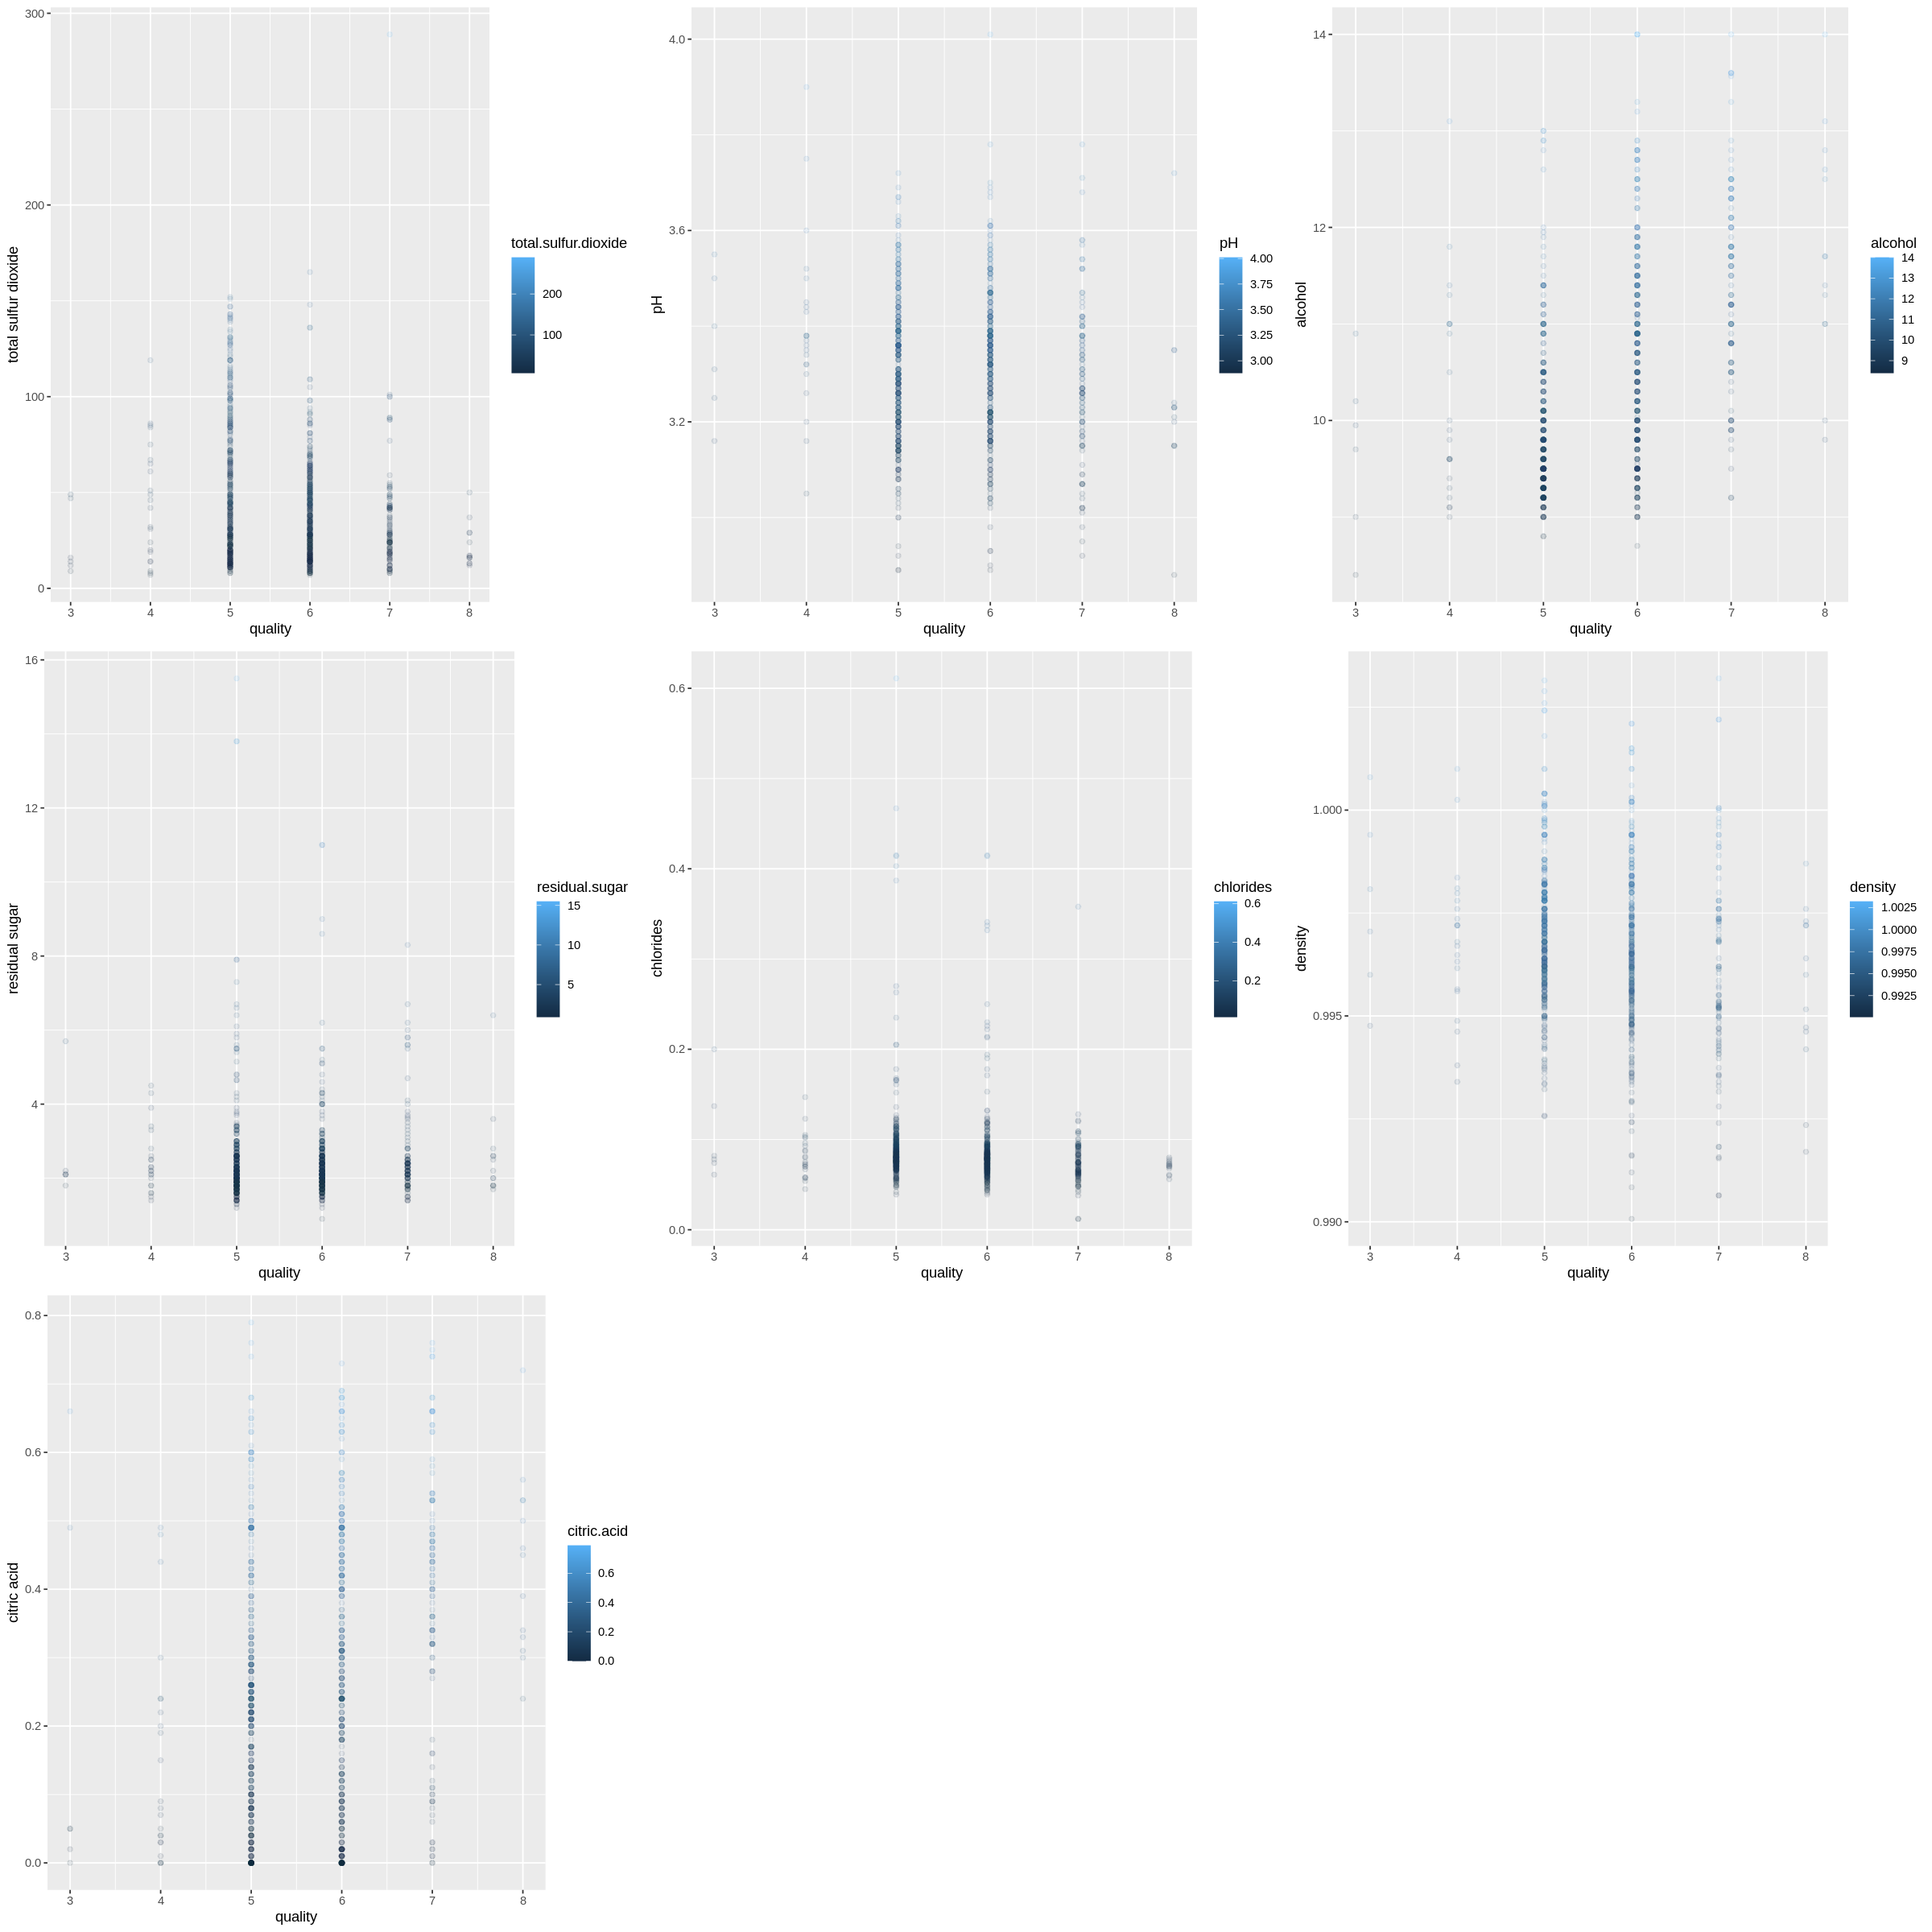

In [61]:
options(repr.plot.width = 20, repr.plot.height = 20)

relation_tsd <- wine_train %>%
   ggplot(aes(x = total.sulfur.dioxide, y = quality)) +
   geom_point(aes(colour = total.sulfur.dioxide), alpha = 0.1) +
   coord_flip() +
   xlab("total sulfur dioxide") +
   ylab("quality")

relation_ph <- wine_train %>%
   ggplot(aes(x = pH, y = quality)) +
   geom_point(aes(colour = pH), alpha = 0.1) +
   coord_flip() +
   xlab("pH") +
   ylab("quality")

relation_ah <- wine_train %>%
   ggplot(aes(x = alcohol, y = quality)) +
   geom_point(aes(colour = alcohol), alpha = 0.1) +
   coord_flip() +
   xlab("alcohol") +
   ylab("quality")

relation_rs <- wine_train %>%
   ggplot(aes(x = residual.sugar, y = quality)) +
   geom_point(aes(color = residual.sugar), alpha = 0.1) +
   coord_flip() +
   xlab("residual sugar") +
   ylab("quality")

relation_ch <- wine_train %>%
   ggplot(aes(x = chlorides, y = quality)) +
   geom_point(aes(color = chlorides), alpha = 0.1) +
   coord_flip() +
   xlab("chlorides") +
   ylab("quality")

relation_ds <- wine_train %>%
   ggplot(aes(x = density, y = quality)) +
   geom_point(aes(color = density), alpha = 0.1) +
   coord_flip() +
   xlab("density") +
   ylab("quality")

relation_ca <- wine_train %>%
   ggplot(aes(x = citric.acid, y = quality)) +
   geom_point(aes(color = citric.acid), alpha = 0.1) +
   coord_flip() +
   xlab("citric acid") +
   ylab("quality")

plot_grid(relation_tsd, relation_ph, relation_ah, relation_rs, relation_ch, relation_ds, relation_ca)